# 📚 Importing Libraries 📚

In [40]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
import seaborn as sns
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# 📊 **Understanding and Preparing Data for Prediction** 📊

In [2]:
# Load the training dataset
train_data = pd.read_csv('/kaggle/input/ieeenu-cis-senior-members-time-forecasting/train (1).csv')

# Preprocess the training data
train_data.replace('-', np.nan, inplace=True)  # Replace missing values represented as "-"

# Separate the features and target variables
X_train = train_data.drop(columns=["pm2.5"])
y_train = train_data["pm2.5"]

# Load the test dataset
test_data = pd.read_csv('/kaggle/input/ieeenu-cis-senior-members-time-forecasting/test.csv')

# Preprocess the test data
# Replace missing values represented as "-" with NaN in the specified columns
missing_value_columns = ['pm2.5']
test_data.replace('-', np.nan, inplace=True)

# Ensure that training data has the same columns in the same order as the test data
X_train = X_train.reindex(test_data.columns, axis=1)

# Print column names to identify the mismatch
print("X_train columns:", X_train.columns)
print("test_data columns:", test_data.columns)

X_train columns: Index(['ID', 'pm2.5', 'DEWP', 'TEMP', 'PRES', 'Iws', 'Is', 'Ir', 'time',
       'cbwd_NE', 'cbwd_NW', 'cbwd_SE', 'cbwd_cv'],
      dtype='object')
test_data columns: Index(['ID', 'pm2.5', 'DEWP', 'TEMP', 'PRES', 'Iws', 'Is', 'Ir', 'time',
       'cbwd_NE', 'cbwd_NW', 'cbwd_SE', 'cbwd_cv'],
      dtype='object')


# 📊 **Exploring Data Patterns and Trends** 📊

In [10]:
train_data.head()

,Unnamed: 0,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir,time,cbwd_NE,cbwd_NW,cbwd_SE,cbwd_cv
0,24,129.0,-16,-4.0,1020.0,1.79,0,0,2010-01-02 00:00:00,0,0,1,0
1,25,148.0,-15,-4.0,1020.0,2.68,0,0,2010-01-02 01:00:00,0,0,1,0
2,26,159.0,-11,-5.0,1021.0,3.57,0,0,2010-01-02 02:00:00,0,0,1,0
3,27,181.0,-7,-5.0,1022.0,5.36,1,0,2010-01-02 03:00:00,0,0,1,0
4,28,138.0,-7,-5.0,1022.0,6.25,2,0,2010-01-02 04:00:00,0,0,1,0


In [11]:
df = pd.read_csv('/kaggle/input/ieeenu-cis-senior-members-time-forecasting/train (1).csv', header=0, index_col=0)
df.describe()

,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir,cbwd_NE,cbwd_NW,cbwd_SE,cbwd_cv
count,29229.000000,29229.000000,29229.000000,29229.000000,29229.000000,29229.000000,29229.000000,29229.000000,29229.000000,29229.000000,29229.000000
mean,100.252592,1.562045,11.811352,1016.352561,25.326136,0.068904,0.224332,0.113141,0.329946,0.353621,0.203291
std,92.646375,14.435907,12.424307,10.516361,50.129046,0.846814,1.573939,0.316771,0.470201,0.478102,0.402454
min,0.000000,-29.000000,-19.000000,991.000000,0.450000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,-11.000000,1.000000,1008.000000,1.790000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,74.000000,1.000000,13.000000,1016.000000,6.260000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,141.000000,15.000000,23.000000,1025.000000,24.590000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,994.000000,28.000000,41.000000,1046.000000,565.490000,27.000000,36.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
train_data_columns = df.columns.tolist()
train_data_columns

['pm2.5',
 'DEWP',
 'TEMP',
 'PRES',
 'Iws',
 'Is',
 'Ir',
 'time',
 'cbwd_NE',
 'cbwd_NW',
 'cbwd_SE',
 'cbwd_cv']

In [13]:
df.describe()

,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir,cbwd_NE,cbwd_NW,cbwd_SE,cbwd_cv
count,29229.000000,29229.000000,29229.000000,29229.000000,29229.000000,29229.000000,29229.000000,29229.000000,29229.000000,29229.000000,29229.000000
mean,100.252592,1.562045,11.811352,1016.352561,25.326136,0.068904,0.224332,0.113141,0.329946,0.353621,0.203291
std,92.646375,14.435907,12.424307,10.516361,50.129046,0.846814,1.573939,0.316771,0.470201,0.478102,0.402454
min,0.000000,-29.000000,-19.000000,991.000000,0.450000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,-11.000000,1.000000,1008.000000,1.790000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,74.000000,1.000000,13.000000,1016.000000,6.260000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,141.000000,15.000000,23.000000,1025.000000,24.590000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,994.000000,28.000000,41.000000,1046.000000,565.490000,27.000000,36.000000,1.000000,1.000000,1.000000,1.000000


<Axes: >

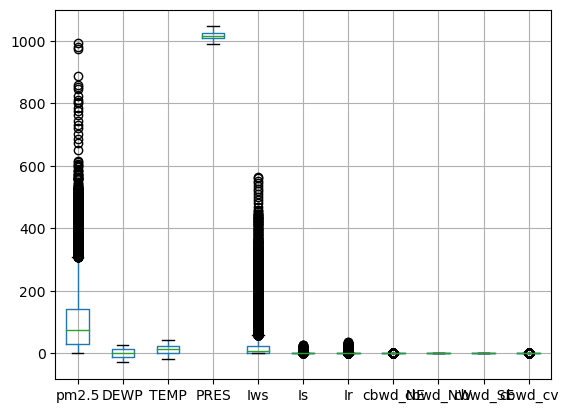

In [14]:
df.boxplot()

/tmp/ipykernel_33/587724400.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plt.matshow(df.corr())


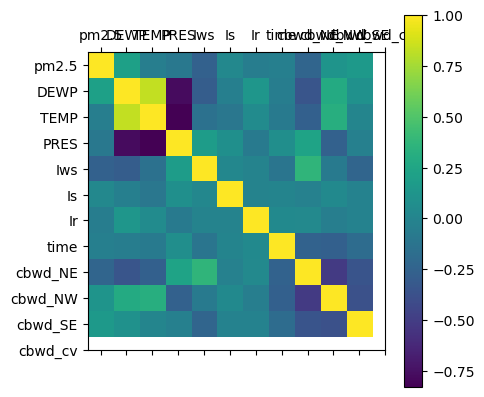

In [18]:
cor_cols = train_data_columns
plt.matshow(df.corr())
plt.xticks(range(len(cor_cols)), cor_cols)
plt.yticks(range(len(cor_cols)), cor_cols)
plt.colorbar()
plt.show()

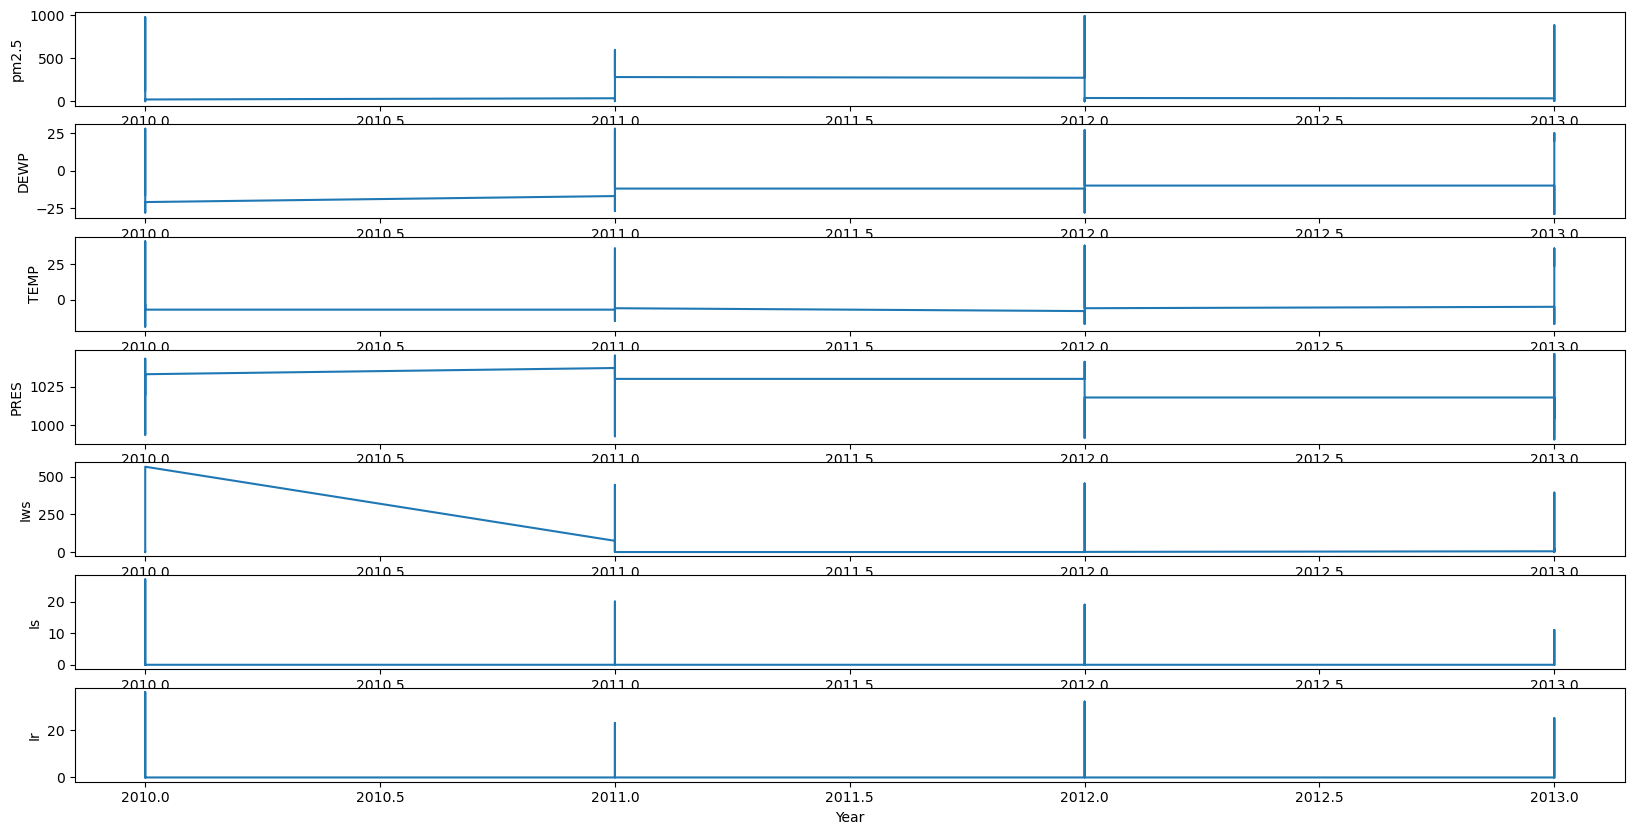

In [16]:
f, axarr = plt.subplots(7, 1, figsize=(20, 10))
axarr[0].plot(pd.to_datetime(train_data['time']).dt.year, train_data["pm2.5"])
axarr[0].set_ylabel("pm2.5")

axarr[1].plot(pd.to_datetime(train_data['time']).dt.year, train_data["DEWP"])
axarr[1].set_ylabel("DEWP")

axarr[2].plot(pd.to_datetime(train_data['time']).dt.year, train_data["TEMP"])
axarr[2].set_ylabel("TEMP")

axarr[3].plot(pd.to_datetime(train_data['time']).dt.year, train_data["PRES"])
axarr[3].set_ylabel("PRES")

axarr[4].plot(pd.to_datetime(train_data['time']).dt.year, train_data['Iws'])
axarr[4].set_ylabel("Iws")

axarr[5].plot(pd.to_datetime(train_data['time']).dt.year, train_data["Is"])
axarr[5].set_ylabel("Is")

axarr[6].plot(pd.to_datetime(train_data['time']).dt.year, train_data["Ir"])
axarr[6].set_ylabel("Ir")

plt.xlabel("Year")
plt.show()

# 📊 **Getting Data Ready for Learning** 📊

In [21]:
# Load the training dataset
train_data = pd.read_csv('/kaggle/input/ieeenu-cis-senior-members-time-forecasting/train (1).csv')

# Preprocess the training data
train_data.replace('-', np.nan, inplace=True)

# Separate the features and target variables
X_train = train_data.drop(columns=["pm2.5"])
y_train = train_data["pm2.5"]

# 📊 **Reading, Trimming, and Displaying Data** 📊

In [22]:
df = pd.read_csv('/kaggle/input/ieeenu-cis-senior-members-time-forecasting/train (1).csv')
del df[df.columns[0]]
df

,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir,time,cbwd_NE,cbwd_NW,cbwd_SE,cbwd_cv
0,129.0,-16,-4.0,1020.0,1.79,0,0,2010-01-02 00:00:00,0,0,1,0
1,148.0,-15,-4.0,1020.0,2.68,0,0,2010-01-02 01:00:00,0,0,1,0
2,159.0,-11,-5.0,1021.0,3.57,0,0,2010-01-02 02:00:00,0,0,1,0
3,181.0,-7,-5.0,1022.0,5.36,1,0,2010-01-02 03:00:00,0,0,1,0
4,138.0,-7,-5.0,1022.0,6.25,2,0,2010-01-02 04:00:00,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
29224,56.0,19,31.0,1004.0,16.09,0,0,2013-07-21 18:00:00,0,0,1,0
29225,48.0,19,29.0,1004.0,17.88,0,0,2013-07-21 19:00:00,0,0,1,0
29226,42.0,19,28.0,1004.0,19.67,0,0,2013-07-21 20:00:00,0,0,1,0
29227,50.0,21,27.0,1005.0,20.56,0,0,2013-07-21 21:00:00,0,0,1,0


# 🔤🔢 Data Encoding Adventure 🔤🔢

In [ ]:
# Encode non categorical values
values = df.values
encoder = LabelEncoder()
values= encoder.fit_transform(values[:,4])
values = values.astype('float64')
values = values.reshape(-1, 1)

# 📈🔢 Scaling Data📈🔢

In [ ]:
#Normalising data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_dataset = scaler.fit_transform(values)

# 🔍🛠️ Preparing Test Data 🔍🛠️

In [25]:
# Load the test dataset
test_data = pd.read_csv('/kaggle/input/ieeenu-cis-senior-members-time-forecasting/test.csv')

# Save the first 4 "pm2.5" values from the test data
first_4_pm25_values = test_data["pm2.5"][:4]

# Drop the "pm2.5" column from the test data
test_data.drop(columns=["pm2.5"], inplace=True)

# Preprocess the test data
# Replace missing values represented as "-" with NaN in the specified columns
missing_value_columns = ['pm2.5']
test_data.replace('-', np.nan, inplace=True)

# Handle missing values using mean imputation for numeric columns
numeric_columns = X_train.select_dtypes(include=[np.number]).columns
# Exclude 'Unnamed: 0' from numeric_columns
numeric_columns = [col for col in numeric_columns if col != 'Unnamed: 0']

imputer = SimpleImputer(strategy='mean')
X_train[numeric_columns] = imputer.fit_transform(X_train[numeric_columns])
test_data[numeric_columns] = imputer.transform(test_data[numeric_columns])

# 📅🌞 **Time Travel: Exploring Data's Time Dimensions** 📅🌞

In [26]:
# Extract relevant components from the 'time' column
X_train['year'] = pd.to_datetime(X_train['time']).dt.year
X_train['month'] = pd.to_datetime(X_train['time']).dt.month
X_train['day'] = pd.to_datetime(X_train['time']).dt.day
X_train.drop(columns=['time'], inplace=True)

test_data['year'] = pd.to_datetime(test_data['time']).dt.year
test_data['month'] = pd.to_datetime(test_data['time']).dt.month
test_data['day'] = pd.to_datetime(test_data['time']).dt.day
test_data.drop(columns=['time'], inplace=True)

# 📂 **Sliding Windows: Seeing Patterns in Data** 📂

In [27]:
# Separate the combined data back into training and test datasets
X_test = test_data

# Set the window size for sliding approach
window_size = 4

# Create overlapping windows for training data
def create_windows(data, window_size):
    windows = []
    for i in range(len(data) - window_size + 1):
        windows.append(data[i:i+window_size])
    return np.array(windows)

# Create overlapping windows for test data
X_test_windows = create_windows(X_test, window_size)

# 🚂 Train Windows🚂

In [28]:
# Create overlapping windows for training data
X_train_windows = create_windows(X_train, window_size)
y_train_windows = y_train[window_size - 1:]

# 🏗️🔮  RNN Adventure Model 🏗️🔮

In [32]:
# Build the RNN model for multi-output prediction
model = Sequential()

model.add(LSTM(units = 50, return_sequences = True, input_shape=(X_train_windows.shape[1], X_train_windows.shape[2])))
model.add(Dropout(0.2))

model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 50))
model.add(Dropout(0.2))

model.add(Dense(units = 1))

# 🔧📚 Compiling the Model🔧📚

In [34]:
# Compile the model
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# 📊🔮Training 📊🔮

In [36]:
# Split the windows data into training and validation sets
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train_windows, y_train_windows, test_size=0.2, random_state=42)

# Train the RNN model on the training data split
history = model.fit(X_train_split, y_train_split, epochs=10, batch_size=32, validation_data=(X_val, y_val))

# Reshape X_test_windows for LSTM input
X_test_windows_reshaped = X_test_windows.reshape(X_test_windows.shape[0], window_size, X_test_windows.shape[2])

## Predict PM2.5 values for the test windows using the trained model
test_predictions = model.predict(X_test_windows_reshaped)

# Update the missing values in the test_data DataFrame with the predicted values
updated_pm25_values = np.concatenate([first_4_pm25_values, test_predictions.flatten()])
test_data.loc[:, "pm2.5"] = updated_pm25_values[:len(test_data)]

# Reorder the columns to have "pm2.5" as the second column
column_order = ["ID", "pm2.5", "DEWP", "TEMP", "PRES", "Iws", "Is", "Ir", "cbwd_NE", "cbwd_NW", "cbwd_SE", "cbwd_cv", "year", "month", "day"]
test_data = test_data[column_order]

Epoch 1/10
731/731 [==============================] - 8s 11ms/step - loss: 8534.0439 - val_loss: 8983.5352
Epoch 2/10
731/731 [==============================] - 8s 10ms/step - loss: 8530.0771 - val_loss: 8978.3213
Epoch 3/10
731/731 [==============================] - 8s 10ms/step - loss: 8529.1455 - val_loss: 8980.5068
Epoch 4/10
731/731 [==============================] - 8s 10ms/step - loss: 8525.4307 - val_loss: 8981.0234
Epoch 5/10
731/731 [==============================] - 8s 11ms/step - loss: 8533.2432 - val_loss: 8972.7568
Epoch 6/10
731/731 [==============================] - 8s 10ms/step - loss: 8526.2334 - val_loss: 8974.1553
Epoch 7/10
731/731 [==============================] - 7s 10ms/step - loss: 8515.4746 - val_loss: 8979.8867
Epoch 8/10
731/731 [==============================] - 8s 10ms/step - loss: 8506.5146 - val_loss: 8971.4307
Epoch 9/10
731/731 [==============================] - 8s 10ms/step - loss: 8529.2891 - val_loss: 8970.8330
Epoch 10/10
392/392 [================

# 📊📈 Visualizing Predictions📊📈

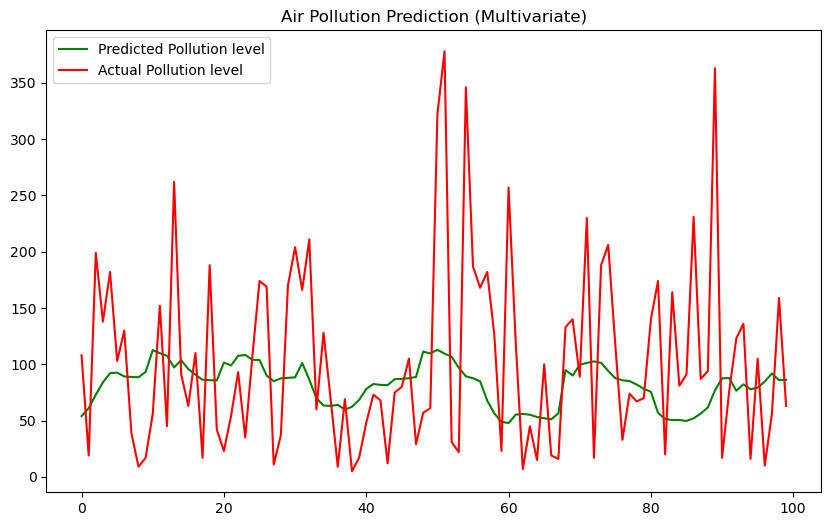

<Figure size 640x480 with 0 Axes>

In [62]:
#Plot the graph between actual vs predicted values
plt.figure(figsize=(10,6))  
plt.plot(test_predictions.values[:100:,], color= 'green',label = 'Predicted Pollution level')
plt.plot(y_val.values[:100] , color = 'red',label = 'Actual Pollution level')
plt.title("Air Pollution Prediction (Multivariate)")
plt.legend()
plt.show()
plt.savefig('graph.png')

# 📝💾 Saving Future Insights📝💾

In [37]:
# Save the updated test dataset to a new CSV file
test_data.drop(columns=["year", "month", "day"]).to_csv("Time Forecasting.csv", index=False)

# 🔮📊 Revealing Future Insights 🔮📊

In [49]:
# Print the updated test dataset with the predicted values
test_data

,ID,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir,cbwd_NE,cbwd_NW,cbwd_SE,cbwd_cv
0,31151,54.000000,21.0,24.0,1005.0,22.34,0.0,0.0,0.0,0.0,1.0,0.0
1,31152,61.000000,21.0,24.0,1005.0,23.23,0.0,0.0,0.0,0.0,1.0,0.0
2,31153,73.000000,20.0,25.0,1005.0,26.36,0.0,0.0,0.0,0.0,1.0,0.0
3,31154,84.000000,20.0,23.0,1004.0,27.25,0.0,0.0,0.0,0.0,1.0,0.0
4,31155,92.133743,20.0,22.0,1005.0,28.14,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
12523,43819,11.884558,-23.0,-2.0,1034.0,231.97,0.0,0.0,0.0,1.0,0.0,0.0
12524,43820,12.565301,-22.0,-3.0,1034.0,237.78,0.0,0.0,0.0,1.0,0.0,0.0
12525,43821,12.905208,-22.0,-3.0,1034.0,242.70,0.0,0.0,0.0,1.0,0.0,0.0
12526,43822,12.919751,-22.0,-4.0,1034.0,246.72,0.0,0.0,0.0,1.0,0.0,0.0
